# Document Clustering with LLM Embeddings

## Assignment G
**Goal:** Illustrate clustering of documents using state-of-the-art embeddings (LLM Embeddings).

**Dataset:** [20 Newsgroups](https://paperswithcode.com/dataset/20-newsgroups) (We use a subset for speed).

In [1]:
!pip install -q sentence-transformers

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(17)

## 1. Load Data
We load a subset of the 20 Newsgroups dataset (4 categories).

In [3]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=17)
documents = newsgroups.data
labels = newsgroups.target

print(f"Number of documents: {len(documents)}")

Number of documents: 3759


## 2. Generate Embeddings
We use `all-MiniLM-L6-v2` from `sentence-transformers` which is fast and effective.

In [4]:
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(documents, show_progress_bar=True)

print(f"Embedding shape: {embeddings.shape}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/118 [00:00<?, ?it/s]

Embedding shape: (3759, 384)


## 3. Cluster Documents
We use K-Means with `k=4` (since we know there are 4 categories).

In [5]:
kmeans = KMeans(n_clusters=4, random_state=17, n_init=15)
pred_labels = kmeans.fit_predict(embeddings)

## 4. Visual Analysis
We use t-SNE to reduce dimensionality to 2D for visualization, as it preserves local structure better than PCA for high-dimensional text embeddings.

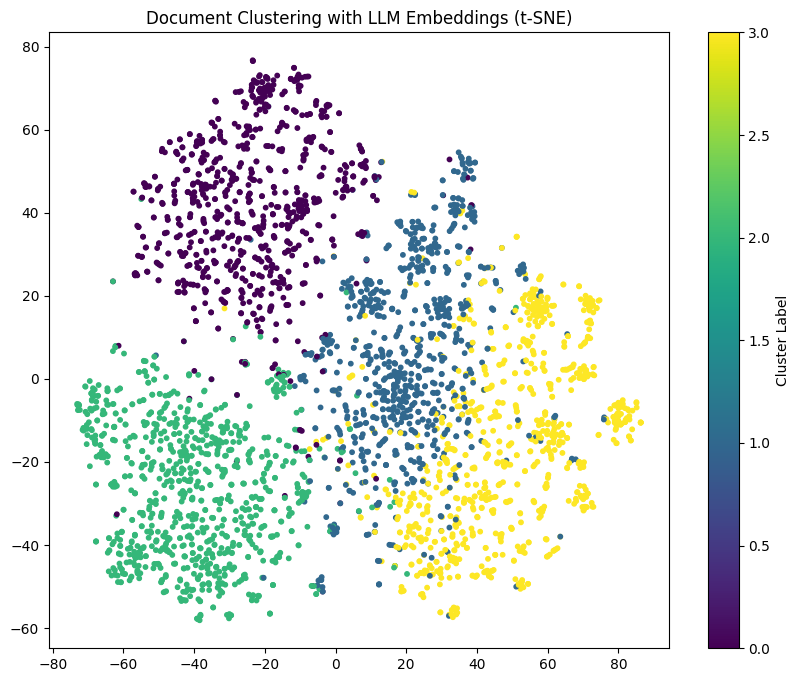

In [6]:
tsne = TSNE(n_components=2, random_state=17)
embeddings_2d = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=pred_labels, cmap='viridis', s=10)
plt.title('Document Clustering with LLM Embeddings (t-SNE)')
plt.colorbar(scatter, label='Cluster Label')
plt.show()

## 5. Evaluation
We compare the clusters with the true labels.

In [7]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(labels, pred_labels)
nmi = normalized_mutual_info_score(labels, pred_labels)

print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Normalized Mutual Information: {nmi:.4f}")

Adjusted Rand Index: 0.6935
Normalized Mutual Information: 0.6756
